<a href="https://www.kaggle.com/code/ghassenbennacer/salary-data-predection-sgd?scriptVersionId=132394232" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import  LabelEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/salary-data/Salary_Data.csv


In [2]:
#Read the data 
df = pd.read_csv('/kaggle/input/salary-data/Salary_Data.csv')

In [3]:
#SHow data 
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [4]:
df.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [5]:
#Checking Null Values 
df.isna().sum()


Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [6]:
#droping null values 
df.dropna(inplace=True)

In [7]:
X = df.copy()
# Remove our dependt variable from X 
y = X.pop('Salary')

#standardization
preprocessor = make_column_transformer(
    (StandardScaler(),
     make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(sparse=False),
     make_column_selector(dtype_include=object)),
)

X = preprocessor.fit_transform(X)
y = np.log(y) # log transform target instead of standardizing

input_shape = [X.shape[1]]
print("Input shape: {}".format(input_shape))

Input shape: [203]


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [8]:
X_length = len(X)
y_length = len(y)

print("Length of X: {}".format(X_length))
print("Length of y: {}".format(y_length))

Length of X: 6698
Length of y: 6698


In [9]:
gender_label = LabelEncoder()

In [10]:
#converting categorical variables into numerical 
df['Gender']=gender_label.fit_transform(df['Gender'])
edu_label_encoder = LabelEncoder()
df['Education Level'] = edu_label_encoder.fit_transform(df['Education Level'])
job_title_encoder = LabelEncoder()
df['Job Title']=job_title_encoder.fit_transform(df['Job Title'])

In [11]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,1,0,175,5.0,90000.0
1,28.0,0,3,18,3.0,65000.0
2,45.0,1,5,144,15.0,150000.0
3,36.0,0,0,115,7.0,60000.0
4,52.0,1,3,25,20.0,200000.0


In [12]:
#training 
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [13]:
from tensorflow.keras import callbacks

# define an early stopping callback
early_stopping =callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,)

In [14]:
from tensorflow import keras
from tensorflow.keras import layers

#creating the model 
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=input_shape),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1),
])

In [15]:
#compile 
model.compile(
    optimizer='adam',
    loss='mae',
)

In [16]:
#fitting the model 
history = model.fit(
     X_train, y_train,
    validation_data=(X, y),
   
    batch_size= 265, 
    epochs= 500,
    
    callbacks=[early_stopping]
)

Epoch 1/500
19/19 [==============================] - 3s 60ms/step - loss: 11.2060 - val_loss: 10.8118
Epoch 2/500
19/19 [==============================] - 1s 33ms/step - loss: 10.2241 - val_loss: 9.5666
Epoch 3/500
19/19 [==============================] - 1s 36ms/step - loss: 8.6372 - val_loss: 8.8064
Epoch 4/500
19/19 [==============================] - 1s 33ms/step - loss: 6.4202 - val_loss: 3.9393
Epoch 5/500
19/19 [==============================] - 1s 34ms/step - loss: 3.7659 - val_loss: 1.0264
Epoch 6/500
19/19 [==============================] - 1s 32ms/step - loss: 2.3489 - val_loss: 0.7503
Epoch 7/500
19/19 [==============================] - 1s 33ms/step - loss: 1.9542 - val_loss: 0.4917
Epoch 8/500
19/19 [==============================] - 1s 33ms/step - loss: 1.6288 - val_loss: 0.3012
Epoch 9/500
19/19 [==============================] - 1s 32ms/step - loss: 1.3822 - val_loss: 0.3097
Epoch 10/500
19/19 [==============================] - 1s 35ms/step - loss: 1.2005 - val_loss: 0.3

Minimum Validation Loss: 0.1221


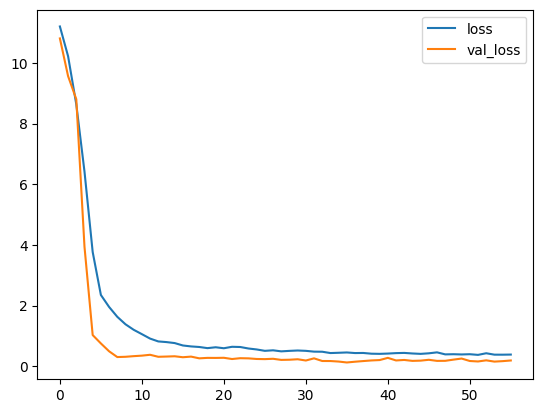

In [17]:
#printing the loss curve 
history_df = pd.DataFrame(history.history)

history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

### Results of SGD 

In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = model.predict(X_test)

# Convert y_test and y_pred to 1-dimensional arrays or Series
y_test = y_test.ravel()
y_pred = y_pred.ravel()

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error: {:.2f}".format(mse))
print("Mean Absolute Error: {:.2f}".format(mae))
print("R-squared: {:.2f}".format(r2))





53/53 [==============================] - 0s 3ms/step
Mean Squared Error: 0.20
Mean Absolute Error: 0.14
R-squared: 0.42


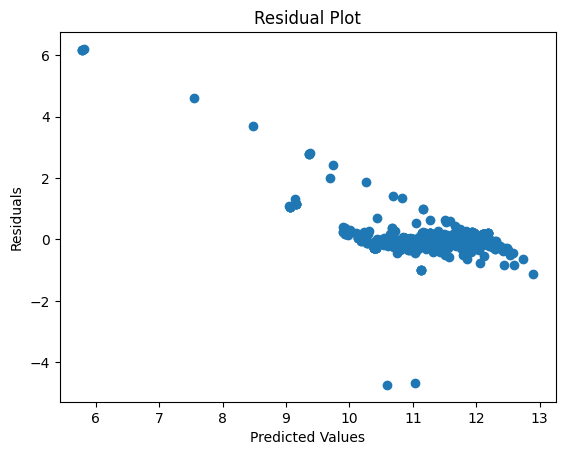

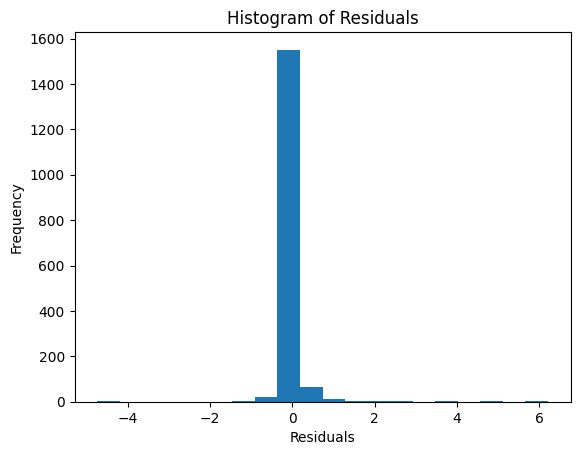

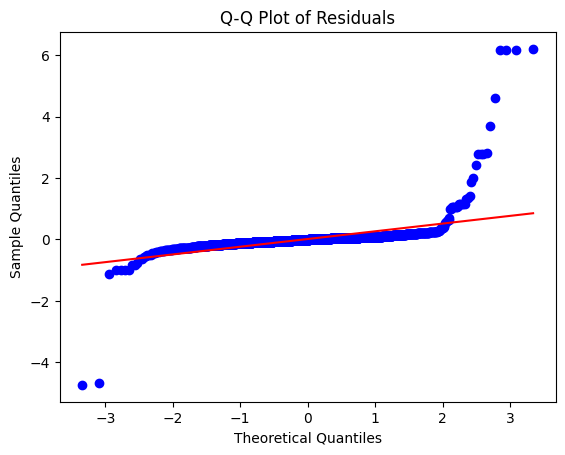

In [19]:
import numpy as np
import matplotlib.pyplot as plt



# Residual plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Histogram of residuals
plt.hist(residuals, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

# Q-Q plot of residuals
import scipy.stats as stats
stats.probplot(residuals, dist='norm', plot=plt)
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title('Q-Q Plot of Residuals')
plt.show()


### Adagard 

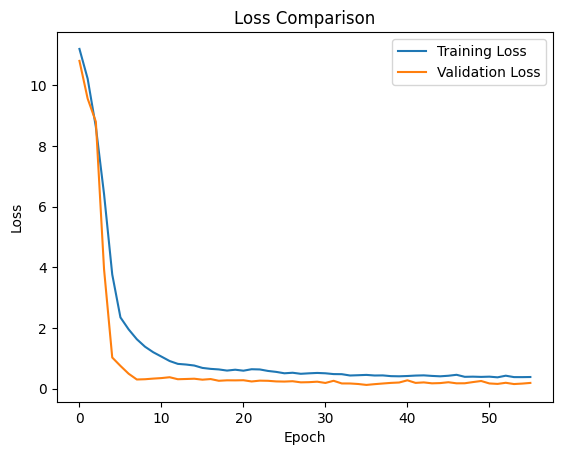

In [20]:
# Initialize parameters
learning_rate = 0.01
epochs = 1000
epsilon = 1e-8

# Convert y_train to a NumPy array if it's a DataFrame
if isinstance(y_train, pd.DataFrame):
    y_train_array = y_train.values.flatten()
elif isinstance(y_train, pd.Series):
    y_train_array = y_train.values
else:
    y_train_array = y_train
    
# Initialize weights and bias
w = np.zeros((X_train.shape[1],))
b = 0

# Initialize squared gradients
squared_gradient_w = np.zeros((X_train.shape[1],))
squared_gradient_b = 0

# Perform training
for epoch in range(epochs):
    # Calculate predicted values
    y_pred = np.dot(X_train, w) + b
    
    # Reshape y_pred to match the shape of y_train_array
    y_pred_reshaped = y_pred.reshape(y_train_array.shape)
    
    # Calculate gradients
    gradient_w = np.mean((y_pred_reshaped - y_train_array)*X_train.T, axis=1)
    gradient_b = np.mean(y_pred_reshaped - y_train_array)
    
    # Update squared gradients
    squared_gradient_w += gradient_w**2
    squared_gradient_b += gradient_b**2
    
    # Update weights and bias
    w -= (learning_rate / np.sqrt(squared_gradient_w + epsilon)) * gradient_w
    b -= (learning_rate / np.sqrt(squared_gradient_b + epsilon)) * gradient_b
    
# Plot the loss and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = model.predict(X_test)

# Convert y_test and y_pred to 1-dimensional arrays or Series
y_test = y_test.ravel()
y_pred = y_pred.ravel()

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Printing
print("Mean Squared Error: {:.2f}".format(mse))
print("Mean Absolute Error: {:.2f}".format(mae))
print("R-squared: {:.2f}".format(r2))

53/53 [==============================] - 0s 3ms/step
Mean Squared Error: 0.20
Mean Absolute Error: 0.14
R-squared: 0.42


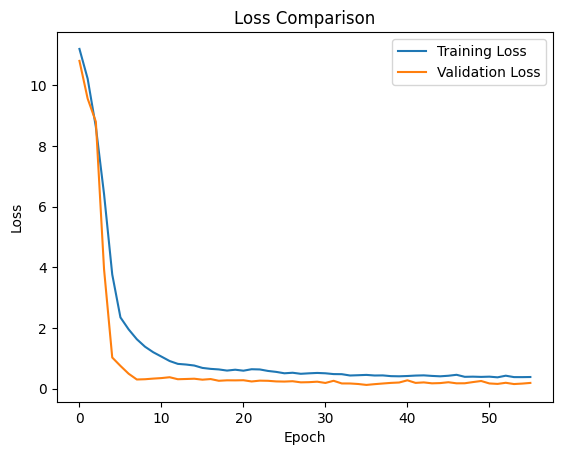

In [22]:
# Initialize parameters
learning_rate = 0.01
epochs = 1000
epsilon = 1e-8

# Convert y_train to a NumPy array if it's a DataFrame

if isinstance(y_train, pd.DataFrame):
    y_train_array = y_train.values.flatten()
elif isinstance(y_train, pd.Series):
    y_train_array = y_train.values
else:
    y_train_array = y_train

# Initialize weights and bias
w = np.zeros((X_train.shape[1],))
b = 0

# Initialize squared gradients
squared_gradient_w = np.zeros((X_train.shape[1],))
squared_gradient_b = 0

# Perform training
for epoch in range(epochs):
    # Calculate predicted values
    y_pred = np.dot(X_train, w) + b
    
    # Reshape y_pred to match the shape of y_train_array
    y_pred_reshaped = y_pred.reshape(y_train_array.shape)
    
    # Calculate gradients
    gradient_w = np.mean((y_pred_reshaped - y_train_array) * X_train.T, axis=1)
    gradient_b = np.mean(y_pred_reshaped - y_train_array)
    
    # Update squared gradients
    squared_gradient_w += 0.9*squared_gradient_w + 0.1*gradient_w**2 
    squared_gradient_b += 0.9*squared_gradient_b + 0.1*gradient_b**2 
    
    
    
    # Update weights and bias
    w -= (learning_rate / np.sqrt(squared_gradient_w + epsilon)) * gradient_w
    b -= (learning_rate / np.sqrt(squared_gradient_b + epsilon)) * gradient_b
    
# Plot the loss and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = model.predict(X_test)

# Convert y_test and y_pred to 1-dimensional arrays or Series
y_test = y_test.ravel()
y_pred = y_pred.ravel()

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print("Mean Squared Error: {:.2f}".format(mse))
print("Mean Absolute Error: {:.2f}".format(mae))
print("R-squared: {:.2f}".format(r2))

53/53 [==============================] - 0s 2ms/step
Mean Squared Error: 0.20
Mean Absolute Error: 0.14
R-squared: 0.42
